# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | gryfino
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | kapa'a
Processing Record 9 of Set 1 | akureyri
Processing Record 10 of Set 1 | lazaro cardenas
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | galesong
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | lamu
Processing Record 16 of Set 1 | yangor
City not found. Skipping...
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | acarau
Processing Record 21 of Set 1 | colonia
Processing Record 22 of Set 1 | u

Processing Record 40 of Set 4 | luwuk
Processing Record 41 of Set 4 | ambodivoara
City not found. Skipping...
Processing Record 42 of Set 4 | muravlenko
Processing Record 43 of Set 4 | miyazu
Processing Record 44 of Set 4 | praia da vitoria
Processing Record 45 of Set 4 | kataragama
City not found. Skipping...
Processing Record 46 of Set 4 | ridder
Processing Record 47 of Set 4 | tevragh zeina
City not found. Skipping...
Processing Record 48 of Set 4 | nadym
Processing Record 49 of Set 4 | las cruces
Processing Record 0 of Set 5 | lembar
City not found. Skipping...
Processing Record 1 of Set 5 | dudinka
Processing Record 2 of Set 5 | alpine
Processing Record 3 of Set 5 | tura
Processing Record 4 of Set 5 | akjoujt
Processing Record 5 of Set 5 | severo-yeniseyskiy
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | port hedland
Processing Record 8 of Set 5 | nagqu
Processing Record 9 of Set 5 | taytay
Processing Record 10 of Set 5 | lorengau
Processing Record 11 of S

Processing Record 30 of Set 8 | la punta
Processing Record 31 of Set 8 | puerto colombia
Processing Record 32 of Set 8 | le puy-en-velay
Processing Record 33 of Set 8 | lake munmorah
Processing Record 34 of Set 8 | enoch
Processing Record 35 of Set 8 | al 'aziziyah
Processing Record 36 of Set 8 | punta arenas
Processing Record 37 of Set 8 | riversdale
Processing Record 38 of Set 8 | pocatello
Processing Record 39 of Set 8 | kerikeri
Processing Record 40 of Set 8 | kandri
Processing Record 41 of Set 8 | dalhart
Processing Record 42 of Set 8 | natal
Processing Record 43 of Set 8 | hotan
Processing Record 44 of Set 8 | coquimbo
Processing Record 45 of Set 8 | barclayville
Processing Record 46 of Set 8 | newport
Processing Record 47 of Set 8 | veraval
Processing Record 48 of Set 8 | suluru
Processing Record 49 of Set 8 | hampton bays
Processing Record 0 of Set 9 | isola di capo rizzuto
Processing Record 1 of Set 9 | kirakira
Processing Record 2 of Set 9 | karatuzskoye
Processing Record 3 o

Processing Record 19 of Set 12 | prieska
Processing Record 20 of Set 12 | pizarro
Processing Record 21 of Set 12 | al ghayzah
Processing Record 22 of Set 12 | kargasok
Processing Record 23 of Set 12 | lyuban'
Processing Record 24 of Set 12 | el kseur
Processing Record 25 of Set 12 | sassandra
Processing Record 26 of Set 12 | sao mateus do maranhao
Processing Record 27 of Set 12 | aden
Processing Record 28 of Set 12 | cabedelo
Processing Record 29 of Set 12 | tomaszow mazowiecki
Processing Record 30 of Set 12 | caconda
Processing Record 31 of Set 12 | madingou
Processing Record 32 of Set 12 | san antonio
Processing Record 33 of Set 12 | belyy yar
Processing Record 34 of Set 12 | palu
Processing Record 35 of Set 12 | annau
Processing Record 36 of Set 12 | thunder bay
Processing Record 37 of Set 12 | varjota
Processing Record 38 of Set 12 | antsiranana
Processing Record 39 of Set 12 | karabash
Processing Record 40 of Set 12 | clovis
Processing Record 41 of Set 12 | taksimo
Processing Reco

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,50.32,38,100,4.61,US,1683663424
1,gryfino,53.2524,14.4883,57.96,59,0,16.80,PL,1683663478
2,thompson,55.7435,-97.8558,69.96,43,75,6.91,CA,1683663479
3,puerto ayora,-0.7393,-90.3518,82.36,92,100,8.99,EC,1683663479
4,klaksvik,62.2266,-6.5890,49.12,86,79,1.01,FO,1683663479


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,50.32,38,100,4.61,US,1683663424
1,gryfino,53.2524,14.4883,57.96,59,0,16.80,PL,1683663478
2,thompson,55.7435,-97.8558,69.96,43,75,6.91,CA,1683663479
3,puerto ayora,-0.7393,-90.3518,82.36,92,100,8.99,EC,1683663479
4,klaksvik,62.2266,-6.5890,49.12,86,79,1.01,FO,1683663479


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

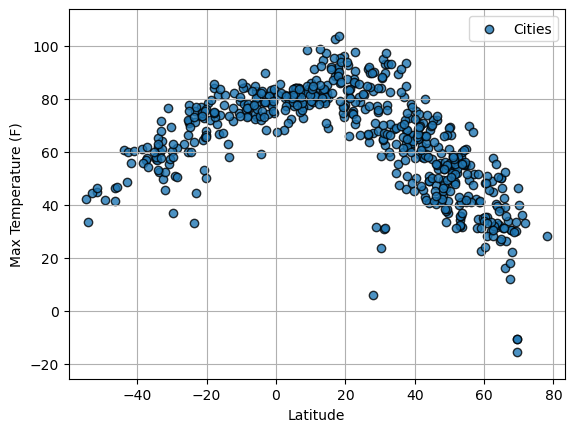

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.xlim(min(city_data_df["Lat"])-5, max(city_data_df["Lat"])+5)
plt.ylim(min(city_data_df["Max Temp"])-10, max(city_data_df["Max Temp"])+10)

# Add the gridlines and legend
plt.grid(True)
plt.legend(loc="best")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

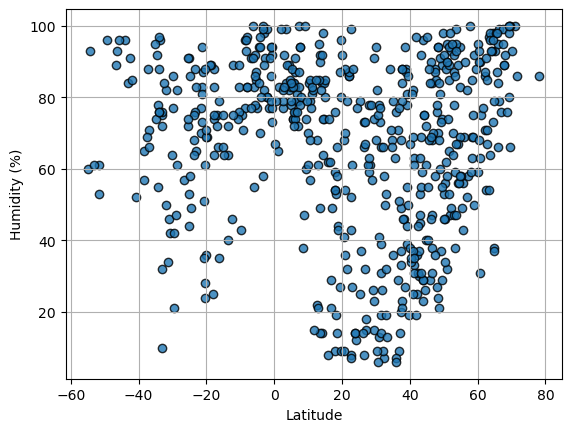

In [34]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

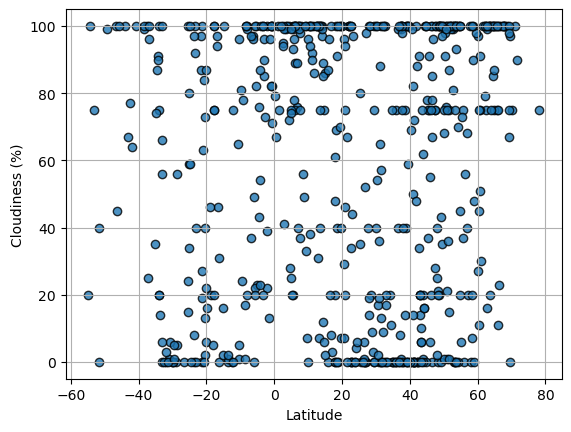

In [36]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

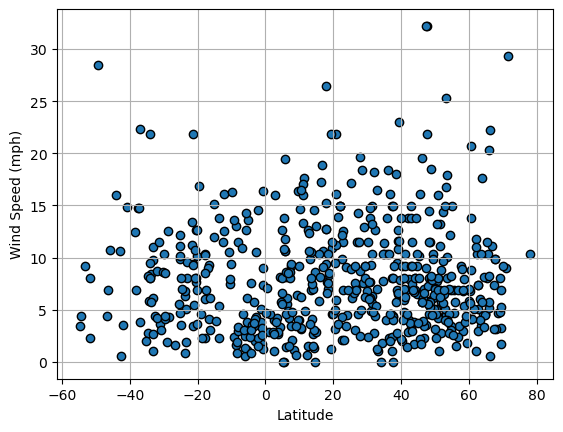

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.annotate(f"R² = {round(rvalue**2, 2)}", (text_coordinates[0], text_coordinates[1]-10), fontsize=15,color="red")
    
    plt.xlabel('Latitude')
    plt.ylabel(title)
    
    print(f"The r-value is: {rvalue}")
    
    plt.show()

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,50.32,38,100,4.61,US,1683663424
1,gryfino,53.2524,14.4883,57.96,59,0,16.80,PL,1683663478
2,thompson,55.7435,-97.8558,69.96,43,75,6.91,CA,1683663479
4,klaksvik,62.2266,-6.5890,49.12,86,79,1.01,FO,1683663479
5,hawaiian paradise park,19.5933,-154.9731,73.04,96,100,4.61,US,1683663479


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto ayora,-0.7393,-90.3518,82.36,92,100,8.99,EC,1683663479
6,blackmans bay,-43.0167,147.3167,48.72,84,67,10.65,AU,1683663479
10,ancud,-41.8697,-73.8203,55.90,85,64,3.58,CL,1683663480
11,puerto natales,-51.7236,-72.4875,45.05,61,0,8.05,CL,1683663480
12,galesong,-5.3166,119.3661,78.82,87,100,6.17,ID,1683663480


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.799540585154451


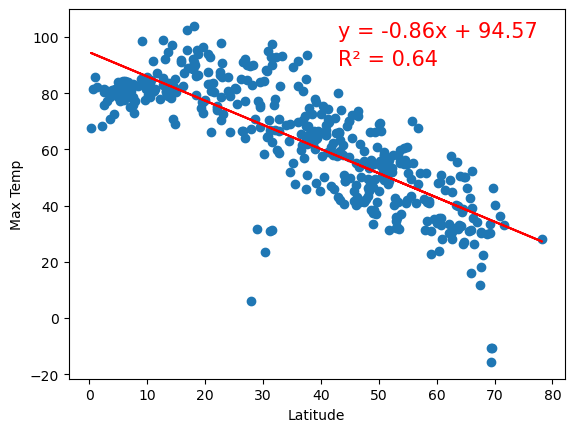

In [86]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (43,100))

The r-value is: 0.784572835523624


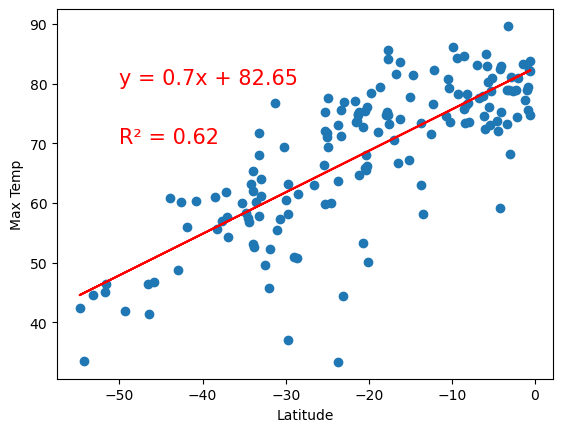

In [76]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-50,80))

**Discussion about the linear relationship:** We can observe differences and similarities in weather variables between Northern and Southern Hemisphere, in the case of Northern Hemisphere it shows colder temperatures at higher latitudes and Southern Hemisphere shows colder temperatures at lower latitudes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10147172816063726


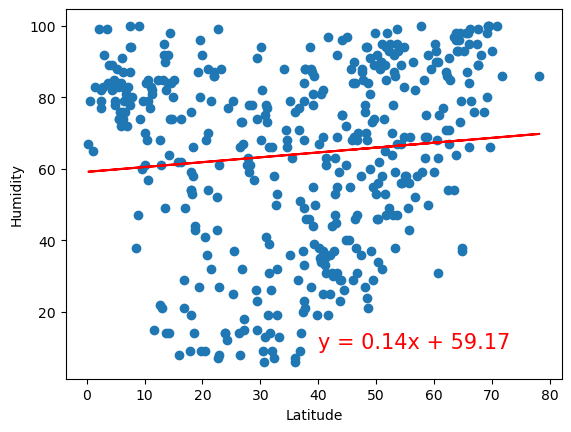

In [87]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (40,10))

The r-value is: 0.22318860919275996


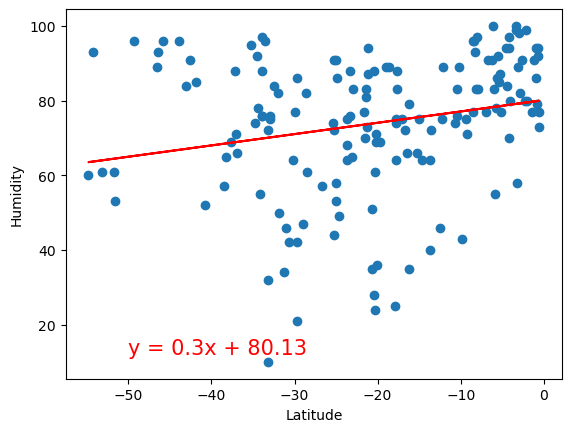

In [98]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50,12))

**Discussion about the linear relationship:** Based on the results there is a slight increase in humidity as latitude increases but relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.016085372598775714


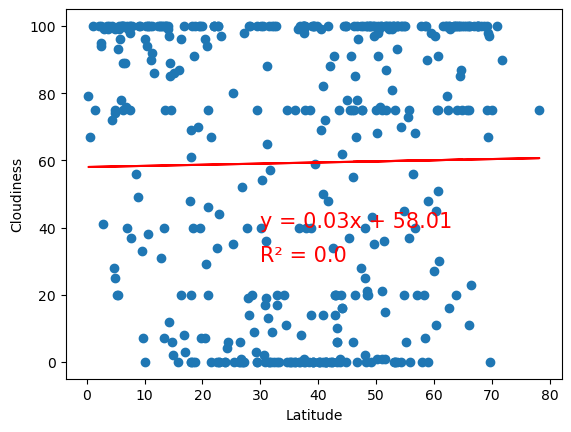

In [99]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (30,40))

The r-value is: 0.07970065173262403


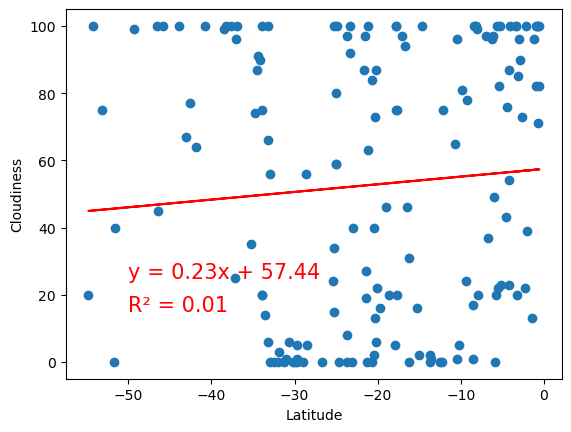

In [100]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-50,25))

**Discussion about the linear relationship:** Based on the regression analysis we can observe there is no significant relationship between Cloudiness and Latitude in bot Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0016039368181745557


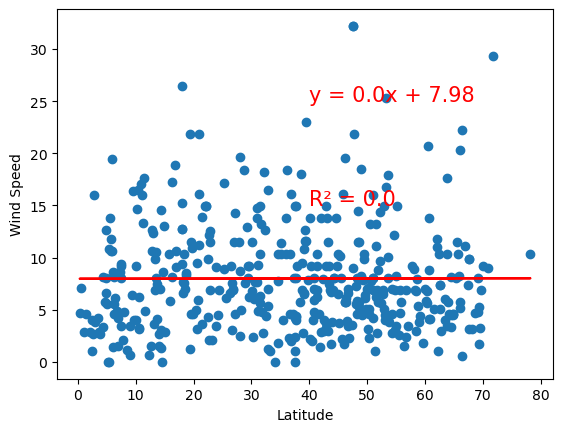

In [101]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (40,25))

The r-value is: -0.18554774669910407


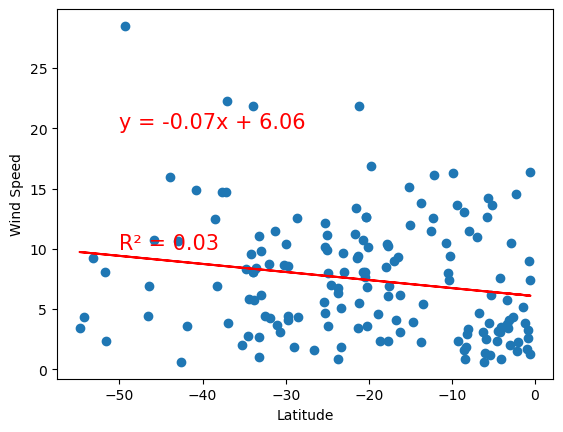

In [102]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-50,20))

**Discussion about the linear relationship:** Based on the regression analysis we can observe there is no significant relationship between Wind Speed and Latitude in bot Hemispheres.